<a href="https://colab.research.google.com/github/sgr1118/PyTorch/blob/main/Chapter14_%EC%A0%95%EA%B7%9C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 14.1 정규화의 개요

### 1. 오버피팅 복습
- 12장 노트북 파일 참고

### 2. 정규화란?

- 오버피팅을 늦추고 모델이 학습 데이터로부터 적절한 특징들을 학습하여 일반화 오차를 낮춰줄 수 있는 기법을 말한다. 잘 일반화된 모델은 노이즈에 더 강인한 모델이 된다.

### 3. 다양한 정규화 방법들

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/01-overview.png)
<center>다양한 정규화 방식</center>

## 14.2 가중치 감쇠

### 1. 가중치 감쇠의 수식 표현
- 가중치 감쇠는 손실 함수를 수정하는 방법을 통해 적용된다. L2를 구하고 기존의 손실 함수와 함께 이 노름을 최소화하도록 하여 모델의 학습을 방해하는 형태로 동작한다. 아래는 그 수식이다.

- $\tilde{\mathcal{L}(\theta)} = \mathcal{L}(\theta) + \alpha||W||_2^2$
- $= \mathcal{L}(\theta) + \alpha W^T \cdot W$
- $where \theta = {W, b}$

- 수식에서 알 수 있듯이 가중치 파라미터의 L2노와 기존의 손실 함수 손실 값을 동시에 최소화하도록 수정되었다. $\alpha$라는 하이퍼파라미터가 추가되어 L2와 기존의 손실 값사이의 균형을 맞춰주도록 한다. 주의할 것은 가중치 파라미터 중에서 편향 b는 가중치 감쇠에서 제외된다.

### 2. 왜 이렇게 하는가?
- 파라미터 W는 선형 계층에서 입출력 노드 사이의 관계를 나타낸다. W에 L2를 적용하여 관계를 약화시켜 각 계층의 출력 노드가 다수의 입력 노드로부터 많이 학습하는 것을 제한한다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/02-why.png)
<center>가중치 파라미터의 W의 각 요소는 선형 계층으로 입출력 노드 사이의 관계를 의미</center>

### 3. L1의 사용
- L2대신 L1을 사용할 수 있다. 수식은 다음과 같다.

- $\tilde{\mathcal{L}(\theta)} = \mathcal{L}(\theta) + \alpha||W||_1$
- $where \theta = {W, b}$

- 이 그림에서 L1이 가지는 가중치 파라미터의 크기를 볼 수 있다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/02-l1_decay.png)
<center>L1 정규화</center>

- $W^*$은 정규화가 적용되지 않은 손실 함수 $\mathcal{L}(\theta)$로 최적화를 수행할 때 얻을 수 있는 가중치 파라미터다. 중앙에서 멀어질수록 손실 값은 높아진다. 학습이 수행될수록 점점 $W^*$에 가까워질 것이다. 하지만 L1, 2를 적용하면 $W^*$에 가까이 다가가지 못하게 한다.

### 4. 가중치 감쇠의 구현
- 가중치 감쇠는 계층 추가가 아닌 파이토치 옵티마이저를 사용하면 된다. weight_decay가 앞서 수식에서 $\alpha$를 뜻한다.

### 5. 손실 함수의 최소화를 방해하는 성질
- $\tilde{\mathcal{L}(\theta)} = \mathcal{L}(\theta) + \alpha||W||_2^2$

- $\mathcal{L}(\theta)$ 이 부분을 학습이 진행될 때 최소화하도록 할 것이다. 앞서 말한 학습 과정은 $\alpha||W||_2^2$ 이 과정을 거치게 된다. 즉 후자 텀을 최소화하는 것은 전자 텀을 최소화하는 것을 방해한다. 여기서 $\alpha$의 값이 중요하다. 설정값이 0에 가까울수록 전자 텀을 최소화하는데 방해다 적어지고 높을수록 가중치 파라미터가 $W^*$에 다가가기 힘들게한다.


## 14.3 데이터 증강
- 데이터 증강은 데이터의 핵심 특징을 간직한 채 노이즈를 더하여 데이터셋을 확장하는 방법이다.

### 1. 이미지 증강 기법
- 생략

### 2. 텍스트 증강 기법
- 이미지보다 증강 난이도가 어렵다. 왜냐하면 어순, 단어, 문장 규칙 등의 이유가 있다. 다음은 텍스트 증강 기법이다.

##### 단어의 생략
- 일정 확률로 임의의 단어를 생략, 적절한 생략 확률이 필요하다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/03-drop_token.png)
<center>단어 생략</center>

##### 단어 교환
- 일정 윈도 내에서 단어를 교환

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/03-exchange_token.png)
<center>단어 교환</center>

##### 단어 이동
- 일정 윈도 내에서 단어를 이동하는 것, 교환보다는 좀 더 공격적인 방법

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/03-move_token.png)
<center>단어 이동</center>

- 한국어는 교착어이기에 어순의 제한을 크게 받지 않기 때문에 이러한 방법이 한국어에서 훨씬 더 잘 작동할 수 있다.

### 3. 데이터 증강의 장점과 한계
- 장점 : 쉬운 데이터 확장, 신경망의 구조나 학습 기법 수정 X
- 단점 : 실제 데이터 수집을 통한 것보다는 성능 개선이 낮음
- 즉, 데이터 증강은 새로운 지식을 배운다는 것보다는 오히려 최적화를 수월하게 수행할 수 있도록 도와주는 측면이 더 강하다.


## 14.4 드롭아웃
- 신경망의 입력 또는 출력 위치에 노이즈를 추가하여 학습을 방해하는 방법이다.

### 1. 드롭아웃의 동작 방식
- 드롭아웃은 임의의 노드를 일정 확률로 드롭하여 학습에 참여하지 않도록 하는 방법이다. 데이터가 신경망을 통과하는 과정이 생략되고 역전파도 일어나지 않는다. 아래 그림은 그 예시이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/04-dropout_overview.png)
<center>드롭아웃 동작 방식</center>

### 2. 학습과 추론 방식의 차이
- 앞서 그림은 학습에서만 적용되는 방법이고 추론(test)에서는 드롭되는 노드없이 모든 노드가 항상 추론에 참여한다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/04-at_inference.png)
<center>드롭아웃의 학습할 때와 추론할 때의 차이</center>

- 이때 중요한 점은 가중치 파라미터 W에 (1-p)를 곱해야한다. 앞서 그림에서 1개의 노드에 3개 선형 계층이 있다. p=0.33이라면 2개의 선형 계층만 학습된다. 하지만 추론할 때는 다음 계층은 항상 전체 노드로부터 값을 전달 받을 것이다. 즉 추론할 때의 다음 계층은 평균적으로 학습할 때보다 1.5배 큰 입력값을 받는 것이다. 따라서 추론할 시 가중치 파라미터에 (1-p) = 0.67을 곱해서 이것을 상쇄해야한다.

- 파이토치에서는 이 부분이 조금 다르게 구현되어 있다. 학습할 때 $\frac{1}{1-p}$를 드롭아웃 계층 출력값에 곱한다. 앞 예재에 따르면 학습할 때 $\frac{1}{1-p} \approx 1.5$를 출력값에 곱해주어 학습과 추론 사이의 차이를 없앨 수 있다.

### 3. 드롭아웃의 구현
- 드롭아웃이 구현되는 위치는 다음 그림과 같이 활성 함수와 다음 계층 사이가 된다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/04-implementation.png)
<center>신경망계층에 드롭아웃 삽입</center>

- 또한 학습과 추론에서 다르게 동작해야하기 때문에 nn.Module을 상속받은 클래스 train()과 eval()이라는 메서드를 제공하여 학습, 추론을 더 쉽게 왔다갔다하게 할 수 있다.

- 학습과 검증으로 구성되는 에포크는 내부에 모델의 학습과 추론의 전환 과정이 포함되어 있어야한다. 만약 이 부분을 놓친다면 모델의 기본은 학습이기 때문에 모델의 성능이 실제 성능에 비해 낮게 나올 것이다.

### 4. 드롭아웃의 의미와 한계
- 드롭아웃이 적용되면 비록 일반화 성능이 개선될 수는 있어도 손실 값의 수렴 속도가 저하될 수 있고 학습 오차가 증가할 수 있다. 또한 p는 하이퍼파라미터이기에 튜닝이 필요하다. 다행히 보통 0.1 ~ 0.5사이에서 0.1 단위의 값으로 튜닝한다.

## 14.5 배치정규화
- 배치정규화는 드롭아웃과 마찬가지로 신경망 계층으로 구현되어 작동할 수 있는 방법이다. 전 기법들은 일반화 성능을 개선하기 위해 학습 및 수렴 속도가 느려지게 되는 단점이 있었다. 하지만 배치정규화는 학습 속도를 향상시킬 수 있고 일반화 성능까지 개선할 수 있다.

### 1. 공변량 변화 문제
- 배치 정규화는 공병랸 문제를 해소하고자하는 방법이다. 아래는 공변량 문제에 대한 그림이다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/05-covariate_shift.png)
<center>공변량 변화</center>

- 공변량 문제는 다음과 같다. 데이터가 신경망을 통과하여 $hat{y}$을 반환한다. 그러면 이 값을 통하여 다시 역전파와 경사하강법을 통하여 파라미터를 업데이트한다. 문제는 DNN이 각 계층들이 서로 어떻게 바뀔지 협의하에 상호작용되지 않는다는 것이다.

- 자세히 예를 들어 n개의 계층을 가진 신경망에서 i번째 계층과 i+1 계층이 있다고 생각하자. 위 과정처럼 $\hat{y}$과 손실이 계산 되었을 것이다. 그리고 가중치 파라미터 $\theta$로 미분하여 각 계층의 파라미터를 업데이트한다. 그 다음 미니배치 $x^'$가 주어졌을 때 i번째 계층을 통과한다.

- 문제는 i+1 계층에서 발생한다. i번째 계층 결과를 바탕으로 모델은 더 나은 출력을 만들기위해 파라미터 업데이트를 수행해야한다. 그런데 업데이트를 했더니 i번째 계층이 다른 출력을 반환해버린다. 따라서 i와 i+1 계층은 다시 성능이 떨어질 수 밖에 없다. 이처럼 계층은 연쇄적으로 작용하기에 공변량 변화 문제가 발생한다.

### 2. 배치정규화의 동작
- 미니배치 분포를 정규화하여 이러한 문제를 해결하고자 한다. 다음은 배치정규화의 수식이다.

- $batch_norm(x) = \gamma \frac{(x-u)}{\sqrt{\sigma^2 + \epsilon}} + \beta$
- $\mu = x.mean(dim = 0)$
- $\sigma  = x.std(dim = 0)$
- $where x \in \mathbb{R}^N*n$ 

- 수식을 보면 미니배치를 가우시안 분포로 바꾸는 정규표준분포화를 한 이후에 스케일 파라미터 $\gamma$와 이동 파라미터 $\beta$를 적용한다. 이때 감마와 베타는 학습되는 가중치 파라미터로써 신경만 내의 비선형적인 성질을 유지하도록 돕는다.

### 3. 학습과 추론의 동작 차이
- 배치정규화도 학습과 추론에서 동작 방식이 다르다. 다른 이유는 미니배치의 평균과 표준편차를 구하는 방식 때문이다.

- 예를 들어 미니배치가 n개의 샘플로 이루어져 있을 때 우리는 전체 n개의 샘플을 살펴보고 이들의 통계 수치를 계산한다. 그런데 미니배치로 병렬 연산을 수핼할 수 있다고 하더라도 미니배치 i번째 샘플에 대한 추론을 수행할 때, i번 이후의 샘플들을 살펴보게된다.

- 즉, 추론 과정에서 미니배치의 전체 샘플들을 살펴보고 통계를 구하는 것은 옳바르지 않다. 따라서 추론 과정에서는 들어오는 샘플들에 대한 MA와 이에 따른 std를 계산하고 활용하여 각 샘플들의 대략적인 표준정규분포화를 수행한다.

### 4. 배치정규화의 구현
- 배치정규화 계층은 선형 계층과 활성 함수 사이에 넣을 것을 제안한다. 하지만 이 경우 드롭아웃과 위치가 달라져 구현 시 불편하다. 따라서 두 번째 이미지처럼 구현할 수 있다.

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/05-where1.png)
<center>선형 계층과 활성 함수 사이에 배치정규화 삽입</center>

![](https://kh-kim.github.io/nlp_with_deep_learning_blog/assets/images/1-14/05-where2.png)
<center>선형 계층과 활성 함수 사이에 배치정규화 삽입</center>

### 5. 배치정규화의 장점과 한계
- 장점 : 추가적인 하이퍼파라미터 튜닝이 필요 X, 일반화 성능 및 학습과 수렴 속도 개선
- 한계 : 동작 원리가 명확하게 밝혀지지 않음. 


## 14.6 정규화

In [1]:
# 라이브러리 불러오기

import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets, transforms

# 데이터 셋 불러오기

train = datasets.MNIST(
    '../data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]),)

test = datasets.MNIST(
    '../data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]),)

# 이미지 데이터 Flatten하기

x = train.data.float() / 255.
y = train.targets

x = x.view(x.size(0), -1)
print(x.shape, y.shape)

# 흑백이미지 동작 코드 작성

input_size = x.size(-1)
output_size = int(max(y)) + 1

print('input_size: %d, output_size: %d' % (input_size, output_size))

# 10개의 확률을 뱉어낸다.

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

torch.Size([60000, 784]) torch.Size([60000])
input_size: 784, output_size: 10


In [2]:
# 데이터셋 나누기
ratios = [.8, .2]

train_cnt = int(x.size(0) * ratios[0])
valid_cnt = int(x.size(0) * ratios[1])
test_cnt = len(test.data)
cnts = [train_cnt, valid_cnt]

print("Train %d / Valid %d / Test %d samples." % (train_cnt, valid_cnt, test_cnt))

# 랜덤 샘플링 수행

indices = torch.randperm(x.size(0))

x = torch.index_select(x, dim=0, index=indices)
y = torch.index_select(y, dim=0, index=indices)

x = list(x.split(cnts, dim=0)) # list로 바꾸지 않으면 tuple error가 발생한다.
y = list(y.split(cnts, dim=0))

x += [(test.data.float() / 255.).view(test_cnt, -1)]
y += [test.targets]

for x_i, y_i in zip(x, y):
    print(x_i.size(), y_i.size())

Train 48000 / Valid 12000 / Test 10000 samples.
torch.Size([48000, 784]) torch.Size([48000])
torch.Size([12000, 784]) torch.Size([12000])
torch.Size([10000, 784]) torch.Size([10000])


### 2. 학습 코드 구현

- DNN을 nn.Sequential로 정의한다. 
- 이번에는 한 단계 더 나아간다. 앞서 모델은 선형 + 비선형 활성 함수의 반복이었다. 이번에 선형 계층 + 비선형 활성 함수 + 정규화 계층이 하나의 서브 모듈이 된다.

In [4]:
# 선형 계층

class Block(nn.Module):
    def __init__(self, input_size, output_size, use_batch_norm = True, dropout_p = .4):
        self.input_size = input_size
        self.output_size = output_size
        self.use_batch_norm = use_batch_norm
        self.dropout_p = dropout_p

        super().__init__()

        def get_regularizer(use_batch_norm, size): # 정규화 수행
            return nn.BatchNorm1d(size) if use_batch_norm else nn.Dropout(dropout_p) # 드롭아웃

        self.block = nn.Sequential(
            nn.Linear(input_size, output_size),
            nn.LeakyReLU(),
            get_regularizer(use_batch_norm, output_size))
        
    def forward(self, x):
        y = self.block(x)
        return y

- 이렇게 정의된 Block은 MyModel 클래스에서 활용할 것이다.

In [5]:
class MyModel(nn.Module):
    def __init__(self, input_size, output_size, use_batch_norm = True, dropout_p = .4):
        super().__init__()

        self.layers = nn.Sequential(
            Block(input_size, 500, use_batch_norm, dropout_p),
            Block(500, 400, use_batch_norm, dropout_p),
            Block(400, 300, use_batch_norm, dropout_p),
            Block(300, 200, use_batch_norm, dropout_p),
            Block(200, 100, use_batch_norm, dropout_p),
            Block(100, 50, use_batch_norm, dropout_p),
            nn.Linear(50, output_size),
            nn.LogSoftmax(dim=-1))
        
    def forward(self, x):
        y = self.layers(x)
        return y

In [6]:
# MyModel 객체 선언

model = MyModel(input_size, output_size, use_batch_norm=True)

print(model)

MyModel(
  (layers): Sequential(
    (0): Block(
      (block): Sequential(
        (0): Linear(in_features=784, out_features=500, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): Block(
      (block): Sequential(
        (0): Linear(in_features=500, out_features=400, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): Block(
      (block): Sequential(
        (0): Linear(in_features=400, out_features=300, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (3): Block(
      (block): Sequential(
        (0): Linear(in_features=300, out_features=200, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(200, e

In [7]:
# 옵티마이저 및 손실 함수 설정

optimizer = optim.Adam(model.parameters())
crit = nn.NLLLoss()

In [8]:
# GPU를 사용할 수 없어 CPU를 사용

device = torch.device('cpu')

if torch.cuda.is_available():
    device = torch.device('gpu')

model = model.to(device)

x = [x_i.to(device) for x_i in x]
y = [y_i.to(device) for y_i in y]

In [9]:
# 학습에 필요한 설정값을 정한다.

n_epochs = 1000
batch_size = 256
print_interval = 10

lowest_loss = np.inf
best_model = None

early_stop = 50
lowest_epoch = np.inf

In [10]:
# 학습 수행
# 앞서 코드와 다른점 : for문 후반부에 검증 작업을 위한 코드가 추가되었다는 것이다.

train_history, valid_history = [] ,[]

for i in range(n_epochs):
    # Shuffle the index to feed-forward
    indices = torch.randperm(x[0].size(0)).to(device)
    x_ = torch.index_select(x[0], dim = 0, index = indices)
    y_ = torch.index_select(y[0], dim = 0, index = indices)

    x_ = x_.split(batch_size, dim = 0)
    y_ = y_.split(batch_size, dim = 0)

    train_loss, valid_loss = 0, 0
    y_hat = []
    
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = crit(y_hat_i, y_i.squeeze()) # 손실함수 NLL 사용

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        train_loss += float(loss) # 메모리 부족을 방지하기 위하여 중요한 부분이다.
    
    train_loss = train_loss / len(x_)

# 검증 데이터셋 사용하기
# 검증 과정에서는 그래디언트 계산이 필요없기 때문에 torch.no_grad()를 사용하여 with내부에서 검증 작업을 진행

    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0
        
        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = crit(y_hat_i, y_i.squeeze())

            valid_loss += loss

            y_hat += [y_hat_i]

    valid_loss = valid_loss / len(x_)

    # 교육이 완료된 후 플롯에 각 손실을 기록합니다

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i+1) % print_interval == 0:
        print('Epoch %d: train_loss=%.4e valid_loss=%.4e lowest_loss = =%.4e' % (i+1, 
                                                                                 train_loss,
                                                                                 valid_loss,
                                                                                 lowest_loss))
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        
        best_model = deepcopy(model.state_dict())
    
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i+1:
            print('%d epoch 이후 더 이상의 개선은 필요 없다.' % early_stop)
            break

print('%d 에포크가 가장 낮은 검증 손실이다. : %.4e' % (lowest_epoch + 1, lowest_loss))

# best model 저장

model.load_state_dict(best_model)

Epoch 10: train_loss=2.1997e-02 valid_loss=8.6088e-02 lowest_loss = =7.8326e-02
Epoch 20: train_loss=9.6034e-03 valid_loss=8.6726e-02 lowest_loss = =7.8326e-02
Epoch 30: train_loss=7.2306e-03 valid_loss=9.6774e-02 lowest_loss = =7.8326e-02
Epoch 40: train_loss=7.2025e-03 valid_loss=9.9456e-02 lowest_loss = =7.8326e-02
Epoch 50: train_loss=4.8989e-03 valid_loss=9.5459e-02 lowest_loss = =7.8326e-02
50 epoch 이후 더 이상의 개선은 필요 없다.
6 에포크가 가장 낮은 검증 손실이다. : 7.8326e-02


<All keys matched successfully>

### 3. 손실 곡선 확인
- 

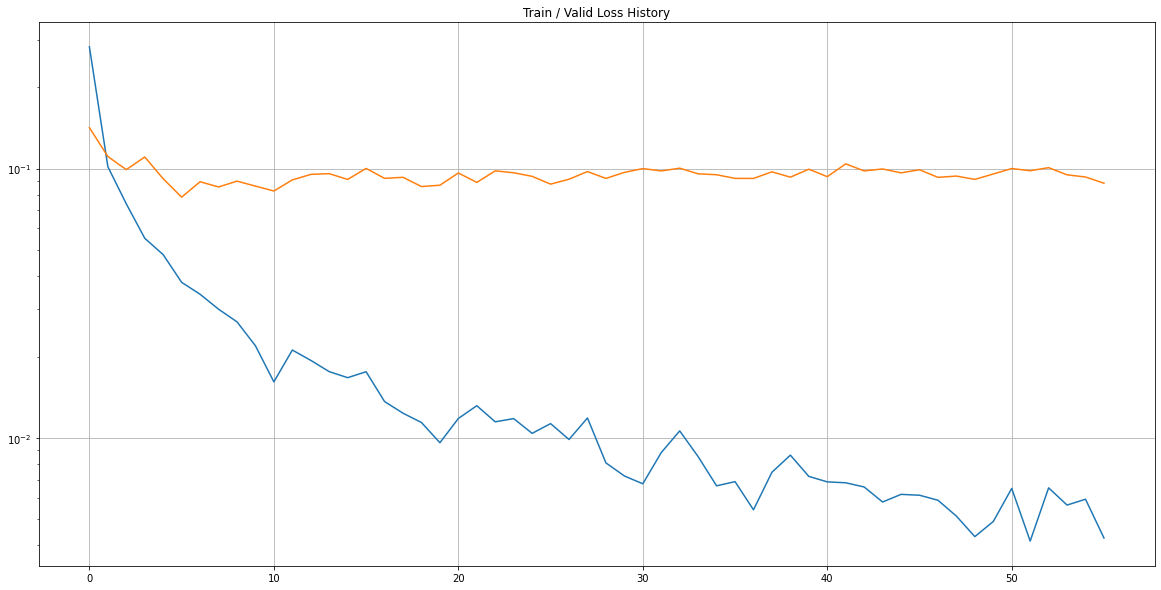

In [11]:
plot_from = 0

plt.figure(figsize=(20,10))
plt.grid('grid') # grid 추가
plt.title('Train / Valid Loss History')
plt.plot(
    range(plot_from, len(train_history)), train_history[plot_from:],
    range(plot_from, len(valid_history)), valid_history[plot_from:],)

plt.yscale('log')
plt.show()

# 학습 곡선은 점차 내려갔고, 검증 곡선은 에포크 16 이후에 천천히 상승한다.

### 4. 결과 확인

In [12]:
test_loss = 0
y_hat = []

with torch.no_grad():
    x_ = x[-1].split(batch_size, dim = 0)
    y_ = y[-1].split(batch_size, dim = 0)

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = crit(y_hat_i, y_i)

        test_loss += loss
        y_hat += [y_hat_i]

test_loss = test_loss / len(x_)
y_hat = torch.cat(y_hat, dim = 0)

sortd_history = sorted(zip(train_history, valid_history), key = lambda x: x[1])

# print('Train_loss : %.4e' % sortd_history[0][0])
# print('Valid_loss : %.4e' % sortd_history[0][1])
print('Test_loss : %.4e' % test_loss)

Test_loss : 8.6402e-02


In [14]:
# 이진 분류 정확도 구하기

correct_cnt = (y[-1] == torch.argmax(y_hat, dim=-1)).sum()
total_cnt = float(y[-1].size(0))

print('Test Accuracy: %.4f' % (correct_cnt / total_cnt))

# 교재랑 달리 이전장보다는 소폭 하락하였다.
# 큰 차이가 보이지 않았다.
# ERR을 사용하여 모델의 상대적인 개선 폭을 측정할 수 있지만 이 부분은 생략한다.

Test Accuracy: 0.9757


ERR수식

- $ERR = \frac{(1 - 비교 모델 성능) - (1 - 현재 모델 성능)}{(1 - 현재 모델 성능)}$

In [15]:
# 혼동 행렬 나타내기

import pandas as pd
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y[-1], torch.argmax(y_hat, dim = -1)),
             index = ['true_%d' % i for i  in range(10)],
             columns = ['pred_%d' % i for i  in range(10)])

# 대부분 분류를 잘 수행한 것으로 나타났다. 앞서 구한 정확도에서 이미 높게 나왔기에 당연한 결과이다.

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
true_0,970,0,1,1,1,1,1,0,4,1
true_1,0,1123,1,2,0,2,1,1,4,1
true_2,3,6,1002,6,1,1,2,8,3,0
true_3,0,0,5,987,0,6,0,5,4,3
true_4,2,0,5,1,950,1,5,3,2,13
true_5,3,0,0,6,0,874,5,1,2,1
true_6,5,3,0,0,2,10,933,0,5,0
true_7,1,2,11,2,1,0,0,1000,1,10
true_8,2,0,3,7,0,6,1,6,945,4
true_9,4,1,2,6,8,4,1,4,6,973


## 14.7 마치며

### 요약

1. 정규화
 - 정규화란 오버피팅을 늦추고 학습 데이터로부터 적절한 특징을 학습하여 일반화 오차를 낮춰줄 주 있는 기법
 - 대부분의 정규화 계층 기법들은 학습과 추론을 별도로 가지고 있다.

2. 드롭아웃  
 - 학습할 때 임의의 확률 p로 신경망의 노드를 비활성화
 - 추론할 때 모든 노드를 활성화 및 계층의 파라미터에 1-p를 곱한다.

1. 배치정규화
 - 하이퍼파라미터가 추가되지 않는다.
 - 정규화가 수행될 뿐만 아니라 학습 손실도 빠르게 감소
 - RNN 계열을 제외하고 대부분 적용 가능
 - 추론할 때에는 학습과 달리 미니배치의 평균을 구하지 않고 MA를 활용하여 정규화